<a href="https://colab.research.google.com/github/potatosoupx/python/blob/main/%EC%B5%9C%EC%86%8C%EC%A0%9C%EA%B3%B1%EB%B2%95%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%98%EC%97%AC_%ED%8F%89%EB%A9%B4%EC%9D%98_%EB%B0%A9%EC%A0%95%EC%8B%9D%EC%9D%84_%EC%B6%94%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

다음은 최소제곱법을 이용하여 3차원 데이터 포인트를 대표하는 평면의 방정식을 추정하고, 원래 데이터 포인트와 추정된 평면을 3D 플롯으로 시각화하는 파이썬 코드 예제입니다.

**필요한 라이브러리:**

* **NumPy:** 수치 계산 및 배열 처리에 사용됩니다.
* **Matplotlib:** 데이터 시각화에 사용됩니다 (특히 3D 플롯을 위해 `mpl_toolkits.mplot3d`를 사용합니다).

**코드:**

추정된 평면 방정식 (z = Ax + By + C 형태): z = 0.72x + 0.69y + 1.04
추정된 평면 방정식 (Ax + By + Cz + D = 0 형태): -0.56x + -0.56y + 0.61z + -0.20 = 0


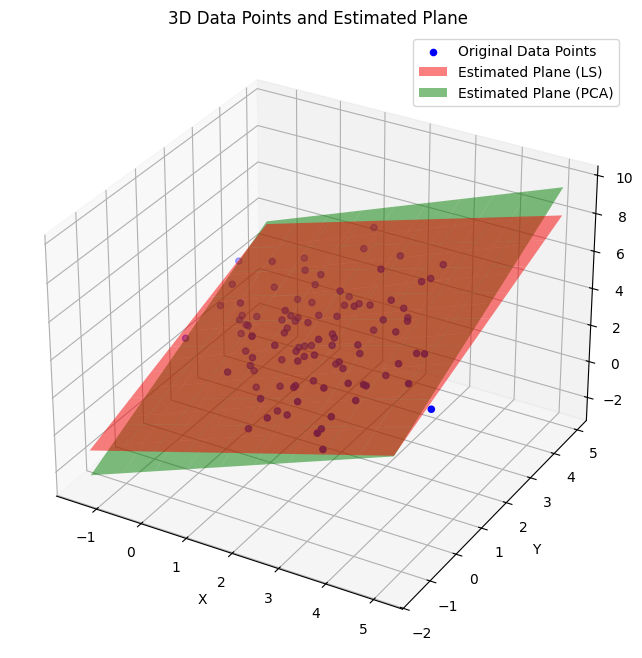

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. 샘플 데이터 생성 (가상의 평면 근처의 점들)
np.random.seed(0)
num_points = 100
true_normal = np.array([1, 1, -1]) # 가상의 평면의 법선 벡터
true_normal = true_normal / np.linalg.norm(true_normal)
point_on_plane = np.array([1, 2, 3])
d = -np.dot(true_normal, point_on_plane) # 평면 방정식 Ax + By + Cz + d = 0 에서의 d 값

points = np.random.rand(num_points, 3) * 5
distances = np.dot(points, true_normal) + d
points += -distances[:, np.newaxis] * true_normal + np.random.normal(0, 0.5, (num_points, 3)) # 평면 근처에 노이즈 추가

x = points[:, 0]
y = points[:, 1]
z = points[:, 2]

# 2. 최소제곱법을 이용한 평면 방정식 추정 (z = Ax + By + C 형태)
# 디자인 행렬 구성
A = np.vstack([x, y, np.ones(len(x))]).T

# z 값 벡터
b = z

# 최소제곱 해 계산
coeffs, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)
a_est, b_est, c_est = coeffs

# 추정된 평면의 방정식: z = a_est * x + b_est * y + c_est

# 또는 평면 방정식 Ax + By + Cz + D = 0 형태로 추정 (PCA 기반 접근)
# 데이터 중심화
centroid = np.mean(points, axis=0)
centered_points = points - centroid

# 공분산 행렬 계산
cov_matrix = np.cov(centered_points, rowvar=False)

# 고유값 및 고유벡터 계산
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# 가장 작은 고유값에 해당하는 고유벡터가 평면의 법선 벡터
normal_vector = eigenvectors[:, np.argmin(eigenvalues)]
A_pca, B_pca, C_pca = normal_vector

# 평면 방정식 Ax + By + Cz + D = 0 에서 D 계산 (평면은 중심점을 지남)
D_pca = -np.dot(normal_vector, centroid)

print(f"추정된 평면 방정식 (z = Ax + By + C 형태): z = {a_est:.2f}x + {b_est:.2f}y + {c_est:.2f}")
print(f"추정된 평면 방정식 (Ax + By + Cz + D = 0 형태): {A_pca:.2f}x + {B_pca:.2f}y + {C_pca:.2f}z + {D_pca:.2f} = 0")

# 3. 결과 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 원본 데이터 포인트 산점도
ax.scatter(x, y, z, c='blue', marker='o', label='Original Data Points')

# 추정된 평면 그리기 (z = Ax + By + C 형태)
x_surf = np.linspace(np.min(x), np.max(x), 10)
y_surf = np.linspace(np.min(y), np.max(y), 10)
X, Y = np.meshgrid(x_surf, y_surf)
Z = a_est * X + b_est * Y + c_est
ax.plot_surface(X, Y, Z, color='red', alpha=0.5, label='Estimated Plane (LS)')

# 추정된 평면 그리기 (Ax + By + Cz + D = 0 형태)
x_surf_pca = np.linspace(np.min(x), np.max(x), 10)
y_surf_pca = np.linspace(np.min(y), np.max(y), 10)
X_pca, Y_pca = np.meshgrid(x_surf_pca, y_surf_pca)
if C_pca != 0:
    Z_pca = (-A_pca * X_pca - B_pca * Y_pca - D_pca) / C_pca
    ax.plot_surface(X_pca, Y_pca, Z_pca, color='green', alpha=0.5, label='Estimated Plane (PCA)')
elif B_pca != 0:
    Y_pca_plot = (-A_pca * X_pca - C_pca * Z - D_pca) / B_pca # Z는 이전 메시드에서 정의되지 않음.
    # 이 경우 평면이 y축에 평행하므로 x-z 평면에 그림을 그리는 것이 적절할 수 있습니다.
    pass
elif A_pca != 0:
    X_pca_plot = (-B_pca * Y_pca - C_pca * Z - D_pca) / A_pca # Z는 이전 메시드에서 정의되지 않음.
    # 이 경우 평면이 x축에 평행하므로 y-z 평면에 그림을 그리는 것이 적절할 수 있습니다.
    pass

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Data Points and Estimated Plane')
ax.legend()
plt.show()

**코드 설명:**

1.  **샘플 데이터 생성:**
    * 가상의 평면의 법선 벡터와 평면 위의 한 점을 정의합니다.
    * 평면 방정식을 이용하여 평면 상의 점들을 생성하고 약간의 노이즈를 추가합니다.

2.  **최소제곱법을 이용한 평면 방정식 추정 (`z = Ax + By + C` 형태):**
    * 평면의 방정식을 $z = Ax + By + C$ 형태로 가정합니다.
    * 디자인 행렬 `A`를 구성합니다. 각 행은 `(x_i, y_i, 1)` 형태입니다.
    * `z` 값들을 벡터 `b`로 만듭니다.
    * `np.linalg.lstsq(A, b, rcond=None)` 함수를 사용하여 최소제곱 해를 구합니다. 이 함수는 $Ax \approx b$ 를 만족하는 해 $x$를 찾습니다. 여기서 $x$는 `(A, B, C)` 계수 벡터입니다.

3.  **최소제곱법을 이용한 평면 방정식 추정 (`Ax + By + Cz + D = 0` 형태 - PCA 기반 접근):**
    * 데이터 포인트들의 중심(centroid)을 계산합니다.
    * 각 데이터 포인트를 중심으로 이동시킵니다.
    * 중심화된 데이터의 공분산 행렬을 계산합니다.
    * 공분산 행렬의 고유값과 고유벡터를 구합니다.
    * 가장 작은 고유값에 해당하는 고유벡터가 데이터의 분산이 가장 작은 방향이므로, 이는 평면의 법선 벡터 $(A, B, C)$가 됩니다.
    * 평면은 데이터의 중심을 지나므로, 중심점의 좌표를 평면 방정식에 대입하여 $D$ 값을 계산합니다.

4.  **결과 시각화:**
    * `matplotlib.pyplot`과 `mpl_toolkits.mplot3d`를 사용하여 3D 플롯을 생성합니다.
    * 원본 데이터 포인트들을 파란색 점으로 산점도에 표시합니다.
    * 최소제곱법으로 추정된 평면 (`z = Ax + By + C` 형태)을 빨간색 반투명 면으로 그립니다. 이를 위해 x와 y 범위에 대한 격자(meshgrid)를 만들고, 추정된 방정식으로 해당 z 값을 계산합니다.
    * PCA 기반으로 추정된 평면 (`Ax + By + Cz + D = 0` 형태)을 녹색 반투명 면으로 그립니다. `C` 계수가 0이 아닌 경우 `z`에 대해 방정식을 풀어서 그립니다. 다른 계수가 0이 아닌 경우에는 해당 축에 대해 풀어서 그리거나, 평면의 방향에 따라 적절한 시각화 방법을 선택해야 합니다.

**실행 방법:**

1.  위의 코드를 파이썬 스크립트 파일 (예: `plane_fitting.py`)로 저장합니다.
2.  필요한 라이브러리 (NumPy, Matplotlib)가 설치되어 있는지 확인합니다. 설치되어 있지 않다면 `pip install numpy matplotlib` 명령어를 사용하여 설치합니다.
3.  터미널 또는 명령 프롬프트에서 스크립트 파일을 실행합니다: `python plane_fitting.py`

실행하면 3D 플롯 창이 나타나고, 파란색 점들로 표시된 원래 데이터 포인트와 빨간색 및 녹색 반투명 면으로 표시된 추정된 평면을 확인할 수 있습니다. 터미널에는 추정된 평면의 방정식이 출력됩니다.